----------------------------------------------------------------------------------------------------------------------

<h2><center>Data Analytics and Visualisation (COM725) - Artefact (AE2)</center></h2>

----------------------------------------------------------------------------------------------------------------------

### Contents:
<b>1. Dataset and dataset prepration</b><br>
1.1. Loading the dataset<br>
1.2. Dataset Overview<br>
1.3. Dataset details (for the table in the report)<br>
1.4. Dataset preparation - Cleansing the data<br>
1.4.1. Missing values<br>
1.4.2. Redundant columns / samples<br>
1.5. Dataset preparation - Data Transforms<br>
1.6. Target Variables Ratio (unbalanced data)<br>
<b>2. Exploratory Data Analysis</b><br>
2.1. Dataset overview<br>
2.2. Outliers<br>
2.3. User input for graphs<br>
2.4. Boxplot<br>
2.5. Barchart<br>
2.6. Histogram(s)<br>
2.5.1. How to deal with skewed data<br>
2.7. Scatterplot(s)<br>
2.8. Heatmap<br>
<b>3. Data Modelling and Visualisation</b><br>
3.1. Time series<br>
3.2. Violin plots<br>
3.3. Hexplot<br>
3.4. Treemap<br>
3.5. Radar chart<br>
3.6. Random Forest Classifier for feature importance<br>
3.7. Simple Linear Regression (with user input for prediction)<br>
3.8. Multiple Linear Regression (with user input for prediction)<br>
3.9. K-means clustering<br>
3.10. Naive Bayes Classification (with user inputs for prediction)

# 1. Dataset and dataset prepration
Importing needed packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from numpy import cov

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import scipy.stats
from scipy import stats
from scipy.stats import norm, pearsonr

## 1.1. Loading the dataset

In [2]:
#Read data and transform the "?" into NaN
data = pd.read_csv(r"risk_factors_cervical_cancer.csv", na_values="?")

data.head()

# ----Initial try: -----
# the NaN transformation was done via 
# data = data.replace('?', np.nan)
# But this proved to be not so good as the dtypes that contained "?" were marked as 'object' instead of 'float'.

Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                              0.0  0.0  ...   
2                      0.0                              0.0  0.0  ...   
3                      1.0                              3.0  0.0  ...   
4                      1.0                             15.0  0.0  ...   

   STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Cytology  Biopsy  
0          0       0       0   0           0         0         0       0  
1          0       0       0   0           0         0         0       0  
2          0       0       0   0           0         0         0       0  
3          1       0       1   0           0         0         0       0  
4          0       0       0   0           0         0         0       0  

[5 rows x 36 columns]

## 1.2. Dataset Overview

In [3]:
#checking if null or not
data.isnull()

Age  Number of sexual partners  First sexual intercourse  \
0    False                      False                     False   
1    False                      False                     False   
2    False                      False                      True   
3    False                      False                     False   
4    False                      False                     False   
..     ...                        ...                       ...   
853  False                      False                     False   
854  False                      False                     False   
855  False                      False                     False   
856  False                      False                     False   
857  False                      False                     False   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 False   False           False                False   
1                 False   False           False                False   
2                 False   False           False                False   
3                 False   False           False                False   
4                 False   False           False                False   
..                  ...     ...             ...                  ...   
853               False   False           False                False   
854               False   False           False                False   
855               False   False           False                False   
856               False   False           False                False   
857               False   False           False                False   

     Hormonal Contraceptives  Hormonal Contraceptives (years)    IUD  ...  \
0                      False                            False  False  ...   
1                      False                            False  False  ...   
2                      False                            False  False  ...   
3                      False                            False  False  ...   
4                      False                            False  False  ...   
..                       ...                              ...    ...  ...   
853                    False                            False  False  ...   
854                    False                            False  False  ...   
855                    False                            False  False  ...   
856                    False                            False  False  ...   
857                    False                            False  False  ...   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                                True                             True   
1                                True                             True   
2                                True                             True   
3                                True                             True   
4                                True                             True   
..                                ...                              ...   
853                              True                             True   
854                              True                             True   
855                              True                             True   
856                              True                             True   
857                              True                             True   

     Dx:Cancer  Dx:CIN  Dx:HPV     Dx  Hinselmann  Schiller  Cytology  Biopsy  
0        False   False   False  False       False     False     False   False  
1        False   False   False  False       False     False     False   False  
2        False   False   False  False       False     False     False   False  
3        False   False   False  False       False     False     False   False  
4        False   False   False  False       False     False     False   False  
..         ...     ...     ...    ...      

In [4]:
#dataset overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [5]:
#getting some overall info
#get the data stats using the describe method
print("\nThe data stats using the describe method:")
print(data.describe())

#getting the mode for each column
print("\nThe mode value of each column is:")
print(data.mode())


The data stats using the describe method:
              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017   

In [6]:
#appx same as above
for column in data.columns: 
    print(column)
    print("min = ", data[column].min())
    print("mean = ", data[column].mean())
    print("median = ", data[column].median())
    print("max = ", data[column].max())
    print("mode = ", data[column].mode())
    print('\n')

Age
min =  13
mean =  26.82051282051282
median =  25.0
max =  84
mode =  0    23
Name: Age, dtype: int64


Number of sexual partners
min =  1.0
mean =  2.527644230769231
median =  2.0
max =  28.0
mode =  0    2.0
Name: Number of sexual partners, dtype: float64


First sexual intercourse
min =  10.0
mean =  16.995299647473562
median =  17.0
max =  32.0
mode =  0    15.0
Name: First sexual intercourse, dtype: float64


Num of pregnancies
min =  0.0
mean =  2.275561097256858
median =  2.0
max =  11.0
mode =  0    1.0
Name: Num of pregnancies, dtype: float64


Smokes
min =  0.0
mean =  0.1455621301775148
median =  0.0
max =  1.0
mode =  0    0.0
Name: Smokes, dtype: float64


Smokes (years)
min =  0.0
mean =  1.2197214125857985
median =  0.0
max =  37.0
mode =  0    0.0
Name: Smokes (years), dtype: float64


Smokes (packs/year)
min =  0.0
mean =  0.45314395064923096
median =  0.0
max =  37.0
mode =  0    0.0
Name: Smokes (packs/year), dtype: float64


Hormonal Contraceptives
min =  0.0
mea

## 1.3. Dataset details (for the table in the report)

In [7]:
#Counting unique values in each column excluding NaN
unique_values_count = data.nunique(dropna=True)
print("Counting unique values in each column excluding NaN")
print(unique_values_count)

Counting unique values in each column excluding NaN
Age                                   44
Number of sexual partners             12
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   62
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       40
IUD                                    2
IUD (years)                           26
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:AIDS                              1
STDs:HIV                               2
STDs:

In [8]:
#Getting unique values in each column 

for column in data.columns: 
    #print(column)
    print(f"Unique values (including NaN) in {column} is:\n{data[column].unique()}\n")

Unique values (including NaN) in Age is:
[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]

Unique values (including NaN) in Number of sexual partners is:
[ 4.  1.  5.  3.  2.  6. nan  7. 15.  8. 10. 28.  9.]

Unique values (including NaN) in First sexual intercourse is:
[15. 14. nan 16. 21. 23. 17. 26. 20. 25. 18. 27. 19. 24. 32. 13. 29. 11.
 12. 22. 28. 10.]

Unique values (including NaN) in Num of pregnancies is:
[ 1.  4.  2.  6.  3.  5. nan  8.  7.  0. 11. 10.]

Unique values (including NaN) in Smokes is:
[ 0.  1. nan]

Unique values (including NaN) in Smokes (years) is:
[ 0.         37.         34.          1.26697291  3.         12.
         nan 18.          7.         19.         21.         15.
 13.         16.          8.          4.         10.         22.
 14.          0.5        11.          9.          2.          5.
  6.          1.         32.         24.         28.         20.
  0.16  

In [9]:
#Get the percentage of each value in each column

for column in data.columns:
    print("Column name: ", column)
    #prints value counts in a sorted descending order
    #print(data[column].value_counts().sort_values(ascending=False))
    
    #prints value counts as a percentage in a sorted descending order 
    #mul = get multiplication of dataframe, DataFrame.mul()
    print(data[column].value_counts(normalize=True).mul(100).sort_values(ascending=False).round(2).astype(str) + '%')

Column name:  Age
23    6.29%
18    5.83%
21    5.36%
20    5.24%
19    5.13%
24    4.55%
25    4.55%
26    4.43%
28    4.31%
17    4.08%
30    4.08%
27    3.85%
29    3.85%
22     3.5%
35    3.38%
33    3.26%
31    3.15%
34     2.8%
36     2.8%
16    2.68%
15    2.45%
32     2.1%
37    1.98%
41    1.52%
40     1.4%
38    1.05%
39    1.05%
44     0.7%
45     0.7%
42     0.7%
14    0.58%
43    0.58%
46    0.35%
52    0.23%
48    0.23%
70    0.23%
49    0.23%
59    0.12%
79    0.12%
84    0.12%
47    0.12%
13    0.12%
50    0.12%
51    0.12%
Name: Age, dtype: object
Column name:  Number of sexual partners
2.0     32.69%
3.0      25.0%
1.0     24.76%
4.0      9.38%
5.0      5.29%
6.0      1.08%
7.0      0.84%
8.0      0.48%
15.0     0.12%
10.0     0.12%
28.0     0.12%
9.0      0.12%
Name: Number of sexual partners, dtype: object
Column name:  First sexual intercourse
15.0    19.15%
17.0    17.74%
18.0     16.1%
16.0    14.22%
14.0     9.28%
19.0     7.05%
20.0     4.35%
13.0     2.94%
21.

## 1.4. Dataset preparation - Cleansing the data
### 1.4.1. Missing values

In [10]:
#Getting the percentage of missing values per column in a descending order, rounded up to 2 decimals 
round(data.isnull().sum()/len(data)*100,2).sort_values(ascending=False).astype(str) + '%'

STDs: Time since last diagnosis       91.72%
STDs: Time since first diagnosis      91.72%
IUD                                   13.64%
IUD (years)                           13.64%
Hormonal Contraceptives               12.59%
Hormonal Contraceptives (years)       12.59%
STDs:pelvic inflammatory disease      12.24%
STDs:vulvo-perineal condylomatosis    12.24%
STDs:HPV                              12.24%
STDs:Hepatitis B                      12.24%
STDs:HIV                              12.24%
STDs:AIDS                             12.24%
STDs:molluscum contagiosum            12.24%
STDs:genital herpes                   12.24%
STDs:syphilis                         12.24%
STDs:vaginal condylomatosis           12.24%
STDs:cervical condylomatosis          12.24%
STDs:condylomatosis                   12.24%
STDs (number)                         12.24%
STDs                                  12.24%
Num of pregnancies                     6.53%
Number of sexual partners              3.03%
Smokes (pa

- STDs: Time since first diagnosis      91.72%
- STDs: Time since last diagnosis       91.72%

Will be deleted within section 1.4.2. Redundant columns / samples

In [11]:
#getting the percentage of missing values per column, rounded up to 2 decimals
round(data.isnull().sum()/len(data)*100,2).astype(str) + '%'

Age                                     0.0%
Number of sexual partners              3.03%
First sexual intercourse               0.82%
Num of pregnancies                     6.53%
Smokes                                 1.52%
Smokes (years)                         1.52%
Smokes (packs/year)                    1.52%
Hormonal Contraceptives               12.59%
Hormonal Contraceptives (years)       12.59%
IUD                                   13.64%
IUD (years)                           13.64%
STDs                                  12.24%
STDs (number)                         12.24%
STDs:condylomatosis                   12.24%
STDs:cervical condylomatosis          12.24%
STDs:vaginal condylomatosis           12.24%
STDs:vulvo-perineal condylomatosis    12.24%
STDs:syphilis                         12.24%
STDs:pelvic inflammatory disease      12.24%
STDs:genital herpes                   12.24%
STDs:molluscum contagiosum            12.24%
STDs:AIDS                             12.24%
STDs:HIV  

In [12]:
#Calculating the number of NaN values per row
print("Calculating the number of NaN values per row")
nan_per_line_list=[]
for i in range(len(data)):
    nan_per_line=data.loc[[i]].isna().sum().sum()
    print(f"Row number {i}: {nan_per_line}")
    nan_per_line_list.append(nan_per_line)

Calculating the number of NaN values per row
Row number 0: 2
Row number 1: 2
Row number 2: 3
Row number 3: 2
Row number 4: 2
Row number 5: 2
Row number 6: 2
Row number 7: 2
Row number 8: 2
Row number 9: 5
Row number 10: 2
Row number 11: 2
Row number 12: 2
Row number 13: 2
Row number 14: 2
Row number 15: 2
Row number 16: 2
Row number 17: 2
Row number 18: 3
Row number 19: 3
Row number 20: 2
Row number 21: 0
Row number 22: 0
Row number 23: 2
Row number 24: 2
Row number 25: 2
Row number 26: 2
Row number 27: 2
Row number 28: 2
Row number 29: 2
Row number 30: 2
Row number 31: 2
Row number 32: 2
Row number 33: 2
Row number 34: 2
Row number 35: 2
Row number 36: 2
Row number 37: 3
Row number 38: 2
Row number 39: 2
Row number 40: 3
Row number 41: 3
Row number 42: 2
Row number 43: 2
Row number 44: 2
Row number 45: 2
Row number 46: 5
Row number 47: 2
Row number 48: 2
Row number 49: 2
Row number 50: 2
Row number 51: 2
Row number 52: 2
Row number 53: 2
Row number 54: 2
Row number 55: 2
Row number 56

In [13]:
#Summary of how many times NaN values appear per row
#print(nan_per_line_list)
for i in range(0, max(nan_per_line_list)):
    x=nan_per_line_list.count(i)
    if x != 0: 
        print(f"{i} (or {round(i*100/36,1)}%) NaN values per row appears {x} times")  #I know I have 36 features total

0 (or 0.0%) NaN values per row appears 59 times
1 (or 2.8%) NaN values per row appears 2 times
2 (or 5.6%) NaN values per row appears 610 times
3 (or 8.3%) NaN values per row appears 58 times
4 (or 11.1%) NaN values per row appears 8 times
5 (or 13.9%) NaN values per row appears 9 times
6 (or 16.7%) NaN values per row appears 5 times
7 (or 19.4%) NaN values per row appears 1 times
9 (or 25.0%) NaN values per row appears 1 times
16 (or 44.4%) NaN values per row appears 4 times
18 (or 50.0%) NaN values per row appears 3 times
19 (or 52.8%) NaN values per row appears 3 times
20 (or 55.6%) NaN values per row appears 75 times
21 (or 58.3%) NaN values per row appears 15 times
22 (or 61.1%) NaN values per row appears 2 times


In [14]:
#Filling the missing values with mean (this is for numerical columns)

# ----below there are the columns that contain missing values----
# Number of sexual partners              3.03% / replace with mean
# First sexual intercourse               0.82% / replace with mean
# Num of pregnancies                     6.53% / replace with mean
# Smokes (years)                         1.52% / replace with mean
# Smokes (packs/year)                    1.52% / replace with mean
# Hormonal Contraceptives (years)       12.59% / replace with mean
# IUD (years)                           13.64% / replace with mean
# STDs (number)                         12.24% / replace with mean


def replace_with_mean(column):
    print("before:\n", data[column].value_counts(dropna=False))
    mean=data[column].mean()
    mean=round(mean,1)
    data[column].fillna(mean, inplace=True)
    print("after:\n", data[column].value_counts(dropna=False))

replace_with_mean('Number of sexual partners')
replace_with_mean('First sexual intercourse')
replace_with_mean('Num of pregnancies')
replace_with_mean('Smokes (years)')
replace_with_mean('Smokes (packs/year)')
replace_with_mean('Hormonal Contraceptives (years)')
replace_with_mean('IUD (years)')
replace_with_mean('STDs (number)')

before:
 2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
NaN      26
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number of sexual partners, dtype: int64
after:
 2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
2.5      26
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number of sexual partners, dtype: int64
before:
 15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
NaN       7
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64
after:
 15.0    163
17.0    158
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
N

In [15]:
#Filling the missing values with mode (this is for bool columns -offically they do not have dtype=bool)

#--------below there are the columns with missing values:-------
# Smokes                                 1.52% / replace with mode
# Hormonal Contraceptives               12.59% / replace with mode
# IUD                                   13.64% / replace with mode
# STDs                                  12.24% / replace with mode
# STDs:condylomatosis                   12.24% / replace with mode
# STDs:cervical condylomatosis          12.24% / replace with mode
# STDs:vaginal condylomatosis           12.24% / replace with mode
# STDs:vulvo-perineal condylomatosis    12.24% / replace with mode
# STDs:syphilis                         12.24% / replace with mode
# STDs:pelvic inflammatory disease      12.24% / replace with mode
# STDs:genital herpes                   12.24% / replace with mode
# STDs:molluscum contagiosum            12.24% / replace with mode
# STDs:AIDS                             12.24% / replace with mode
# STDs:HIV                              12.24% / replace with mode
# STDs:Hepatitis B                      12.24% / replace with mode
# STDs:HPV                              12.24% / replace with mode


def replace_with_mode(column):
    print("before:\n", data[column].value_counts(dropna=False))
    mode=data[column].mode()[0]
    #print(mode)
    data[column].fillna(mode, inplace=True)
    print("after:\n", data[column].value_counts(dropna=False))

replace_with_mode('Smokes')
#print(data['Smokes'])
replace_with_mode('Hormonal Contraceptives')
replace_with_mode('IUD')
replace_with_mode('STDs')
replace_with_mode('STDs:condylomatosis')
replace_with_mode('STDs:cervical condylomatosis')
replace_with_mode('STDs:vaginal condylomatosis')
replace_with_mode('STDs:vulvo-perineal condylomatosis')
replace_with_mode('STDs:syphilis')
replace_with_mode('STDs:pelvic inflammatory disease')
replace_with_mode('STDs:genital herpes')
replace_with_mode('STDs:molluscum contagiosum')
replace_with_mode('STDs:AIDS')
replace_with_mode('STDs:HIV')
replace_with_mode('STDs:Hepatitis B')
replace_with_mode('STDs:HPV')

before:
 0.0    722
1.0    123
NaN     13
Name: Smokes, dtype: int64
after:
 0.0    735
1.0    123
Name: Smokes, dtype: int64
before:
 1.0    481
0.0    269
NaN    108
Name: Hormonal Contraceptives, dtype: int64
after:
 1.0    589
0.0    269
Name: Hormonal Contraceptives, dtype: int64
before:
 0.0    658
NaN    117
1.0     83
Name: IUD, dtype: int64
after:
 0.0    775
1.0     83
Name: IUD, dtype: int64
before:
 0.0    674
NaN    105
1.0     79
Name: STDs, dtype: int64
after:
 0.0    779
1.0     79
Name: STDs, dtype: int64
before:
 0.0    709
NaN    105
1.0     44
Name: STDs:condylomatosis, dtype: int64
after:
 0.0    814
1.0     44
Name: STDs:condylomatosis, dtype: int64
before:
 0.0    753
NaN    105
Name: STDs:cervical condylomatosis, dtype: int64
after:
 0.0    858
Name: STDs:cervical condylomatosis, dtype: int64
before:
 0.0    749
NaN    105
1.0      4
Name: STDs:vaginal condylomatosis, dtype: int64
after:
 0.0    854
1.0      4
Name: STDs:vaginal condylomatosis, dtype: int64
befo

In [16]:
#After replacing missing values - getting the percentage of missing values per column 
round(data.isnull().sum()/len(data)*100,2).astype(str) + '%'

Age                                     0.0%
Number of sexual partners               0.0%
First sexual intercourse                0.0%
Num of pregnancies                      0.0%
Smokes                                  0.0%
Smokes (years)                          0.0%
Smokes (packs/year)                     0.0%
Hormonal Contraceptives                 0.0%
Hormonal Contraceptives (years)         0.0%
IUD                                     0.0%
IUD (years)                             0.0%
STDs                                    0.0%
STDs (number)                           0.0%
STDs:condylomatosis                     0.0%
STDs:cervical condylomatosis            0.0%
STDs:vaginal condylomatosis             0.0%
STDs:vulvo-perineal condylomatosis      0.0%
STDs:syphilis                           0.0%
STDs:pelvic inflammatory disease        0.0%
STDs:genital herpes                     0.0%
STDs:molluscum contagiosum              0.0%
STDs:AIDS                               0.0%
STDs:HIV  

'STDs: Time since first diagnosis' & 'STDs: Time since last diagnosis'
will be deleted within section 'Redundant columns/samples'

### 1.4.2. Redundant columns / samples

In [17]:
#dropping the two columns that have too many missing values
data = data.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])

- In section '1.3. Dataset details (for the table in the report)' it was found out that the below 2 columns have only one category
    - 'STDs:AIDS' is 100% 0/False
    - 'STDs:cervical condylomatosis' is 100% 0/False
- Although there is only one constant value, I will not be deleting/dropping those two columns.
- The reasoning behind this is that cervical cancer occurs more often to people who have their immune system weakened by AIDs and the STDs are a contributing factor to developing cervical cancer. Therefore, even though the columns are fully filled in with zero/false (from which 88% of them are the patient's negative response), I believe they should remain as the results will show patterns or relationships that have those two features negative. When they will be populated with positive answers too, possibly a new set of patterns/relationships will be discovered.

In [18]:
#checking if the 2 columns have dropped
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

## 1.5. Dataset preparation - Data Transforms

In [19]:
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [20]:
#Transforming the column to bool from float

#These are the columns which have been filled in with mode for the missing values. 
#----Below there are the "bool" columns with missing values (offically they do not have dtype=bool):-------
# Smokes                                 1.52% / replace with mode
# Hormonal Contraceptives               12.59% / replace with mode
# IUD                                   13.64% / replace with mode
# STDs                                  12.24% / replace with mode
# STDs:condylomatosis                   12.24% / replace with mode
# STDs:cervical condylomatosis          12.24% / replace with mode
# STDs:vaginal condylomatosis           12.24% / replace with mode
# STDs:vulvo-perineal condylomatosis    12.24% / replace with mode
# STDs:syphilis                         12.24% / replace with mode
# STDs:pelvic inflammatory disease      12.24% / replace with mode
# STDs:genital herpes                   12.24% / replace with mode
# STDs:molluscum contagiosum            12.24% / replace with mode
# STDs:AIDS                             12.24% / replace with mode
# STDs:HIV                              12.24% / replace with mode
# STDs:Hepatitis B                      12.24% / replace with mode
# STDs:HPV                              12.24% / replace with mode

def transform_to_bool(column):
    print("dtype before:\n", data[column].dtype)
    data[column]=data[column].astype(bool)
    print("dtype after:\n", data[column].dtype)

transform_to_bool('Smokes')
#print(data['Smokes'])
transform_to_bool('Hormonal Contraceptives')
transform_to_bool('IUD')
transform_to_bool('STDs')
transform_to_bool('STDs:condylomatosis')
transform_to_bool('STDs:cervical condylomatosis')
transform_to_bool('STDs:vaginal condylomatosis')
transform_to_bool('STDs:vulvo-perineal condylomatosis')
transform_to_bool('STDs:syphilis')
transform_to_bool('STDs:pelvic inflammatory disease')
transform_to_bool('STDs:genital herpes')
transform_to_bool('STDs:molluscum contagiosum')
transform_to_bool('STDs:AIDS')
transform_to_bool('STDs:HIV')
transform_to_bool('STDs:Hepatitis B')
transform_to_bool('STDs:HPV')

dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool
dtype before:
 float64
dtype after:
 bool


In [21]:
#Also, the following columns should be bool (even though they are not missing any values)
# Dx:Cancer                               int64
# Dx:CIN                                  int64
# Dx:HPV                                  int64
# Dx                                      int64
# Hinselmann                              int64
# Schiller                                int64
# Cytology                                int64
# Biopsy                                  int64

transform_to_bool('Dx:Cancer')
transform_to_bool('Dx:CIN')
transform_to_bool('Dx:HPV')
transform_to_bool('Dx')
transform_to_bool('Hinselmann')
transform_to_bool('Schiller')
transform_to_bool('Cytology')
transform_to_bool('Biopsy')

dtype before:
 int64
dtype after:
 bool
dtype before:
 int64
dtype after:
 bool
dtype before:
 int64
dtype after:
 bool
dtype before:
 int64
dtype after:
 bool
dtype before:
 int64
dtype after:
 bool
dtype before:
 int64
dtype after:
 bool
dtype before:
 int64
dtype after:
 bool
dtype before:
 int64
dtype after:
 bool


In [22]:
#data types after converting float to bool
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                   bool
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                  bool
Hormonal Contraceptives (years)       float64
IUD                                      bool
IUD (years)                           float64
STDs                                     bool
STDs (number)                         float64
STDs:condylomatosis                      bool
STDs:cervical condylomatosis             bool
STDs:vaginal condylomatosis              bool
STDs:vulvo-perineal condylomatosis       bool
STDs:syphilis                            bool
STDs:pelvic inflammatory disease         bool
STDs:genital herpes                      bool
STDs:molluscum contagiosum               bool
STDs:AIDS                         

In [23]:
#checking if i should make any changes to the float dtypes 
print(data['Number of sexual partners'].value_counts())       #should stay as float (all good)
print(data['First sexual intercourse'].value_counts())        #-----should be transformed to int
print(data['Num of pregnancies'].value_counts())              #should stay as float (all good)
print(data['Smokes (years)'].value_counts())                  #-----should be rounded up to one decimal
print(data['Smokes (packs/year)'].value_counts())             #-----should be rounded up to one decimal
print(data['Hormonal Contraceptives (years)'].value_counts()) #-----should be rounded up to one decimal
print(data['IUD (years)'].value_counts())                     #-----should be rounded up to one decimal
print(data['STDs (number)'].value_counts())                   #should stay as float (all good)

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
2.5      26
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number of sexual partners, dtype: int64
15.0    163
17.0    158
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64
1.0     270
2.0     240
3.0     139
4.0      74
2.3      56
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: Num of pregnancies, dtype: int64
0.000000     722
1.266973      15
1.200000      13
5.000000       9
9.000000       9
1.000000       8
3.000000       7
2.000000       7
16.000000      6
7.000000       6
8.000000       6
11.000000      5
10.000000      5
4.000000       5
15.000000      4
14.000000      4
6.000000       4
13.000000      3
0.500000    

In [24]:
#data['First sexual intercourse'] should be transformed to int
data['First sexual intercourse']=data['First sexual intercourse'].astype('int64')
data['First sexual intercourse'].dtype

dtype('int64')

In [25]:
#The below columns should be rounded up to one decimal
    
data['Smokes (years)'] = data['Smokes (years)'].astype(float).round(1) 
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].astype(float).round(1) 
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].astype(float).round(1) 
data['IUD (years)'] = data['IUD (years)'].astype(float).round(1) 

#checking if changes were made
print(data['Smokes (years)'].value_counts())
print(data['Smokes (packs/year)'].value_counts())
print(data['Hormonal Contraceptives (years)'].value_counts())
print(data['IUD (years)'].value_counts())

0.0     722
1.3      15
1.2      13
5.0       9
9.0       9
1.0       8
3.0       7
2.0       7
16.0      6
7.0       6
8.0       6
11.0      5
10.0      5
4.0       5
15.0      4
14.0      4
6.0       4
13.0      3
0.5       3
19.0      3
12.0      3
22.0      2
32.0      1
20.0      1
28.0      1
24.0      1
18.0      1
34.0      1
37.0      1
21.0      1
0.2       1
Name: Smokes (years), dtype: int64
0.0     731
0.5      32
0.2       8
0.8       6
1.0       6
3.0       5
1.2       5
2.0       4
1.4       4
2.8       3
6.0       3
0.1       3
0.4       3
5.0       3
12.0      3
1.6       3
2.4       2
8.0       2
0.3       2
4.5       2
9.0       2
7.0       2
3.5       2
2.2       2
2.5       1
1.3       1
22.0      1
0.9       1
4.8       1
7.6       1
4.0       1
2.7       1
19.0      1
3.4       1
7.5       1
21.0      1
0.7       1
2.1       1
37.0      1
3.3       1
5.7       1
15.0      1
2.6       1
5.5       1
Name: Smokes (packs/year), dtype: int64
0.0     269
2.3     110
1

In [26]:
#Final and correct data types 
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse                int64
Num of pregnancies                    float64
Smokes                                   bool
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                  bool
Hormonal Contraceptives (years)       float64
IUD                                      bool
IUD (years)                           float64
STDs                                     bool
STDs (number)                         float64
STDs:condylomatosis                      bool
STDs:cervical condylomatosis             bool
STDs:vaginal condylomatosis              bool
STDs:vulvo-perineal condylomatosis       bool
STDs:syphilis                            bool
STDs:pelvic inflammatory disease         bool
STDs:genital herpes                      bool
STDs:molluscum contagiosum               bool
STDs:AIDS                         

## 1.6. Target Variables Ratio (unbalanced data)

In [27]:
#Checking the target variable ratio
print(data['Hinselmann'].value_counts())
print(data['Schiller'].value_counts())
print(data['Cytology'].value_counts())
print(data['Biopsy'].value_counts())

#using value_counts().tolist() to only get the values of each target variable
#this will be used for the graph
counts_H = data['Hinselmann'].value_counts().tolist()
print(counts_H)

counts_S = data['Schiller'].value_counts().tolist()
print(counts_S)

counts_C = data['Cytology'].value_counts().tolist()
print(counts_C)

counts_B = data['Biopsy'].value_counts().tolist()
print(counts_B)

False    823
True      35
Name: Hinselmann, dtype: int64
False    784
True      74
Name: Schiller, dtype: int64
False    814
True      44
Name: Cytology, dtype: int64
False    803
True      55
Name: Biopsy, dtype: int64
[823, 35]
[784, 74]
[814, 44]
[803, 55]


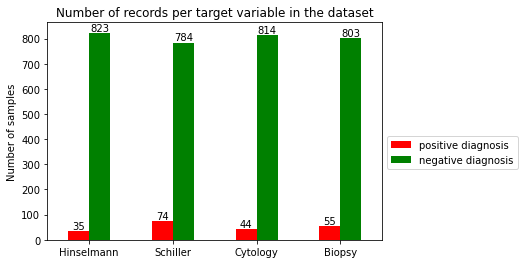

In [28]:
#Creating a grouped bar graph to check the target variables dataset 
labels = ["Hinselmann", "Schiller", "Cytology", "Biopsy"]
positive = [counts_H[1], counts_S[1], counts_C[1], counts_B[1]]
negative = [counts_H[0], counts_S[0], counts_C[0], counts_B[0]]

target_var_data = pd.DataFrame({'positive diagnosis':positive, 
                               'negative diagnosis':negative}, index=labels)

ax = target_var_data.plot.bar(rot=0, color={"positive diagnosis": "red", "negative diagnosis": "green"})
ax.legend(bbox_to_anchor=(1, 0.5)) #moves legend outside / to the right of the graph
ax.set_title('Number of records per target variable in the dataset') 
ax.set_ylabel('Number of samples')

#adding the values on top of the bar graph
annotations = ax.bar_label(ax.containers[0])
annotations = ax.bar_label(ax.containers[1])

- The above graph shows that the dataset is very unbalanced in terms of positive vs negative diagnosises. 
- Based on previous research papers on the same dataset, this was frequenlty addressed using SMOTE.
- This will not be addressed for this coursework due to its aim and objectives.

# 2. Exploratory Data Analysis

## 2.1. Dataset overview

In [29]:
#dataset overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    int64  
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    bool   
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    bool   
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    bool   
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [30]:
#checking if null or not
data.isnull()

Age  Number of sexual partners  First sexual intercourse  \
0    False                      False                     False   
1    False                      False                     False   
2    False                      False                     False   
3    False                      False                     False   
4    False                      False                     False   
..     ...                        ...                       ...   
853  False                      False                     False   
854  False                      False                     False   
855  False                      False                     False   
856  False                      False                     False   
857  False                      False                     False   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 False   False           False                False   
1                 False   False           False                False   
2                 False   False           False                False   
3                 False   False           False                False   
4                 False   False           False                False   
..                  ...     ...             ...                  ...   
853               False   False           False                False   
854               False   False           False                False   
855               False   False           False                False   
856               False   False           False                False   
857               False   False           False                False   

     Hormonal Contraceptives  Hormonal Contraceptives (years)    IUD  ...  \
0                      False                            False  False  ...   
1                      False                            False  False  ...   
2                      False                            False  False  ...   
3                      False                            False  False  ...   
4                      False                            False  False  ...   
..                       ...                              ...    ...  ...   
853                    False                            False  False  ...   
854                    False                            False  False  ...   
855                    False                            False  False  ...   
856                    False                            False  False  ...   
857                    False                            False  False  ...   

     STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV     Dx  \
0       False                      False      False   False   False  False   
1       False                      False      False   False   False  False   
2       False                      False      False   False   False  False   
3       False                      False      False   False   False  False   
4       False                      False      False   False   False  False   
..        ...                        ...        ...     ...     ...    ...   
853     False                      False      False   False   False  False   
854     False                      False      False   False   False  False   
855     False                      False      False   False   False  False   
856     False                      False      False   False   False  False   
857     False                      False      False   False   False  False   

     Hinselmann  Schiller  Cytology  Biopsy  
0         False     False     False   False  
1         False     False     False   False  
2         False     False     False   False  
3         False     False     False   False  
4         False     False     False   False  
..          ...       ...       ...     ...  
853       False     False     False   False  
854       False     False     False   False  
855       False     False     False   False  
856       False

In [31]:
#getting some overall info
#get the data stats using the describe method
print("\nThe data stats using the describe method (table view):")
print(data.describe().T)
#getting the mode for each column
print("\nThe mode value of each column is:")
print(data.mode())


The data stats using the describe method (table view):
                                 count       mean       std   min   25%   50%  \
Age                              858.0  26.820513  8.497948  13.0  20.0  25.0   
Number of sexual partners        858.0   2.526807  1.642274   1.0   2.0   2.0   
First sexual intercourse         858.0  16.995338  2.791883  10.0  15.0  17.0   
Num of pregnancies               858.0   2.277156  1.399338   0.0   1.0   2.0   
Smokes (years)                   858.0   1.220047  4.057883   0.0   0.0   0.0   
Smokes (packs/year)              858.0   0.453497  2.209763   0.0   0.0   0.0   
Hormonal Contraceptives (years)  858.0   2.261305  3.519556   0.0   0.0   1.0   
IUD (years)                      858.0   0.512821  1.805579   0.0   0.0   0.0   
STDs (number)                    858.0   0.179487  0.526496   0.0   0.0   0.0   
STDs: Number of diagnosis        858.0   0.087413  0.302545   0.0   0.0   0.0   

                                  75%   max  
Age   

## 2.2. Outliers

In [32]:
#Outliers percentage, count and values

for column in data.columns:
    #ignore the dtype that are bool
    if data.dtypes[column]!='bool':
        q1=data[column].describe()[['25%'][0]]
        q3=data[column].describe()[['75%'][0]]
        #print("q1=", q1, "q3=", q3)
        iqr = q3-q1
        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)
        print('----------\n')
        print("Lower bound =",lower_bound)
        print("Upper bound =",upper_bound)
        count_outliers=0
        outliers_list=[]
        for i in data[column]:
            #print("i=",i)
            if ((i>upper_bound) or (i<lower_bound)):
                count_outliers=count_outliers+1
                outliers_list.append(i)
        print("Column =", column)
        print("Outliers =", round(count_outliers*100/858,2), "%")
        print("Count of outliers =",count_outliers)
        print("List of outliers =", outliers_list)

----------

Lower bound = 2.0
Upper bound = 50.0
Column = Age
Outliers = 0.93 %
Count of outliers = 8
List of outliers = [52, 51, 59, 79, 84, 52, 70, 70]
----------

Lower bound = 0.5
Upper bound = 4.5
Column = Number of sexual partners
Outliers = 7.93 %
Count of outliers = 68
List of outliers = [5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, 5.0, 5.0, 15.0, 5.0, 8.0, 10.0, 5.0, 7.0, 5.0, 6.0, 6.0, 5.0, 8.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, 28.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 7.0, 5.0, 5.0, 5.0, 7.0, 5.0, 7.0, 6.0, 7.0, 8.0, 5.0, 9.0, 8.0]
----------

Lower bound = 10.5
Upper bound = 22.5
Column = First sexual intercourse
Outliers = 4.78 %
Count of outliers = 41
List of outliers = [23, 26, 26, 25, 27, 23, 24, 26, 24, 23, 27, 27, 32, 29, 23, 29, 28, 10, 23, 26, 24, 23, 27, 10, 24, 26, 26, 29, 24, 28, 25, 28, 29, 23, 27, 29, 23, 26, 27, 23, 24]
----------

Lower bound = -2.0
Upper bound = 6.0
C

In [33]:
#Outliers percentage only
for column in data.columns:
    #ignore the dtype that are bool
    if data.dtypes[column]!='bool':
        q1=data[column].describe()[['25%'][0]]
        q3=data[column].describe()[['75%'][0]]
        iqr = q3-q1
        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)
        count_outliers=0
        outliers_list=[]
        for i in data[column]:
            if ((i>upper_bound) or (i<lower_bound)):
                count_outliers=count_outliers+1
                outliers_list.append(i)
        print("Column =", column)
        print("Outliers =", round(count_outliers*100/858,2), "%\n")

Column = Age
Outliers = 0.93 %

Column = Number of sexual partners
Outliers = 7.93 %

Column = First sexual intercourse
Outliers = 4.78 %

Column = Num of pregnancies
Outliers = 1.17 %

Column = Smokes (years)
Outliers = 15.85 %

Column = Smokes (packs/year)
Outliers = 14.8 %

Column = Hormonal Contraceptives (years)
Outliers = 13.29 %

Column = IUD (years)
Outliers = 23.31 %

Column = STDs (number)
Outliers = 21.45 %

Column = STDs: Number of diagnosis
Outliers = 8.28 %



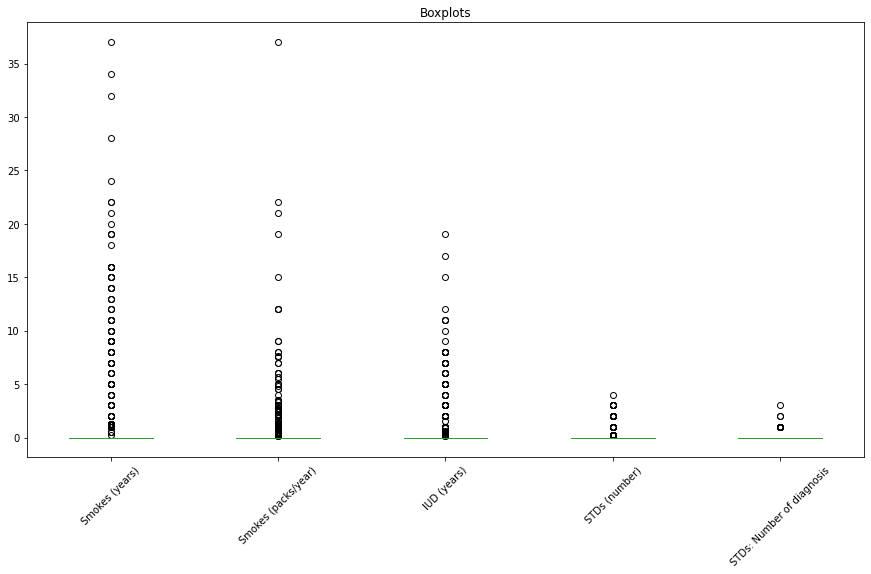

In [34]:
ax = data[['Smokes (years)', 'Smokes (packs/year)', 'IUD (years)', 'STDs (number)','STDs: Number of diagnosis' ]].plot(figsize=(15,8), rot=45, kind='box', title='Boxplots')
plt.show()

## 2.3. User input for graphs

In [35]:
print("Please choose one of the below in order to create the graphs for it (only type the number):")
print("[1]Age\n[2]Number of sexual partners\n[3]First sexual intercourse\n[4]Number of pregnancies\n[5]Smokes\n[6]Smokes (years)\n[7]Smokes (packs/year)\n[8]Hormonal Contraceptives\n[9]Hormonal Contraceptives (years)\n[10]IUD\n[11]IUD (years)\n[12]STDs\n[13]STDs (number)\n[14]STDs: condylomatosis\n[15]STDs: cervical condylomatosis\n[16]STDs: vaginal condylomatosis\n[17]STDs: vulvo-perineal condylomatosis\n[18]STDs: syphilis\n[19]STDs: pelvic inflammatory disease\n[20]STDs: genital herpes\n[21]STDs: molluscum contagiosum\n[22]STDs: AIDS\n[23]STDs: HIV\n[24]STDs: Hepatitis B\n[25]STDs: HPV\n[26]STDs: Number of diagnoses\n[27]Dx: Cancer\n[28]Dx: CIN\n[29]Dx: HPV\n[30]Dx\n[31]Hinselmann\n[32]Schiller\n[33]Cytology\n[34]Biopsy")
user_input=int(input())
if user_input==1: 
    user_input='Age'
elif user_input==2:
    user_input='Number of sexual partners'
elif user_input==3:
    user_input='First sexual intercourse'
elif user_input==4:
    user_input='Num of pregnancies'
elif user_input==5:
    user_input='Smokes'
elif user_input==6:
    user_input='Smokes (years)'
elif user_input==7:
    user_input='Smokes (packs/year)'
elif user_input==8:
    user_input='Hormonal Contraceptives'
elif user_input==9:
    user_input='Hormonal Contraceptives (years)'
elif user_input==10:
    user_input='IUD'
elif user_input==11:
    user_input='IUD (years)'
elif user_input==12:
    user_input='STDs'
elif user_input==13:
    user_input='STDs (number)'
elif user_input==14:
    user_input='STDs:condylomatosis'
elif user_input==15:
    user_input='STDs:vaginal condylomatosis'
elif user_input==16:
    user_input='STDs:vulvo-perineal condylomatosis'
elif user_input==17:
    user_input='STDs:syphilis'
elif user_input==18:
    user_input='STDs:pelvic inflammatory disease'
elif user_input==20:
    user_input='STDs:genital herpes'
elif user_input==21:
    user_input='STDs:molluscum contagiosum'
elif user_input==23:
    user_input='STDs:HIV'
elif user_input==24:
    user_input='STDs:Hepatitis B'
elif user_input==25:
    user_input='STDs:HPV'
elif user_input==26:
    user_input='STDs: Number of diagnoses'
elif user_input==27:
    user_input='Dx:Cancer'
elif user_input==28:
    user_input='Dx:CIN'
elif user_input==29:
    user_input='Dx:HPV'
elif user_input==30:
    user_input='Dx'
elif user_input==31:
    user_input='Hinselmann'
elif user_input==32:
    user_input='Schiller'
elif user_input==33:
    user_input='Cytology'
elif user_input==34:
    user_input='Biopsy'
else:
    print('Invalid option!')
print("You've chosen: ", user_input)

Please choose one of the below in order to create the graphs for it (only type the number):
[1]Age
[2]Number of sexual partners
[3]First sexual intercourse
[4]Number of pregnancies
[5]Smokes
[6]Smokes (years)
[7]Smokes (packs/year)
[8]Hormonal Contraceptives
[9]Hormonal Contraceptives (years)
[10]IUD
[11]IUD (years)
[12]STDs
[13]STDs (number)
[14]STDs: condylomatosis
[15]STDs: cervical condylomatosis
[16]STDs: vaginal condylomatosis
[17]STDs: vulvo-perineal condylomatosis
[18]STDs: syphilis
[19]STDs: pelvic inflammatory disease
[20]STDs: genital herpes
[21]STDs: molluscum contagiosum
[22]STDs: AIDS
[23]STDs: HIV
[24]STDs: Hepatitis B
[25]STDs: HPV
[26]STDs: Number of diagnoses
[27]Dx: Cancer
[28]Dx: CIN
[29]Dx: HPV
[30]Dx
[31]Hinselmann
[32]Schiller
[33]Cytology
[34]Biopsy
1
You've chosen:  Age


## 2.4. Boxplot

mode 0    23
Name: Age, dtype: int64
count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64

----------
Lower bound = 2.0
Upper bound = 50.0
Count of outliers = 8
List of outliers = [52, 51, 59, 79, 84, 52, 70, 70]


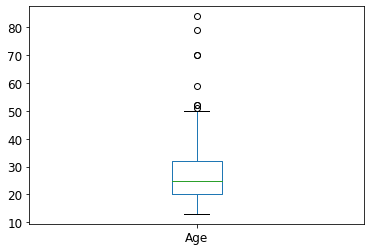

In [36]:
#plotting boxplot

def boxplot(column):
    #ignore the dtype that are bool
    if data.dtypes[column]!='bool':
        boxplot_column = pd.DataFrame(data[column])
        boxplot_column.boxplot(grid=False, rot=0, fontsize=12)
        print("mode", data[column].mode())
        print(data[column].describe())
        q1=data[column].describe()[['25%'][0]]
        q3=data[column].describe()[['75%'][0]]
        #print("q1=", q1, "q3=", q3)
        iqr = q3-q1
        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)
        print('\n----------')
        print("Lower bound =",lower_bound)
        print("Upper bound =",upper_bound)
        count_outliers=0
        outliers_list=[]
        for i in data[column]:
            #print("i=",i)
            if ((i>upper_bound) or (i<lower_bound)):
                count_outliers=count_outliers+1
                outliers_list.append(i)
        print("Count of outliers =",count_outliers)
        print("List of outliers =", outliers_list)
    else:
        print("Cannot create this graph because the column is in a bool format")

boxplot(user_input)

#boxplot("Hormonal Contraceptives (years)")

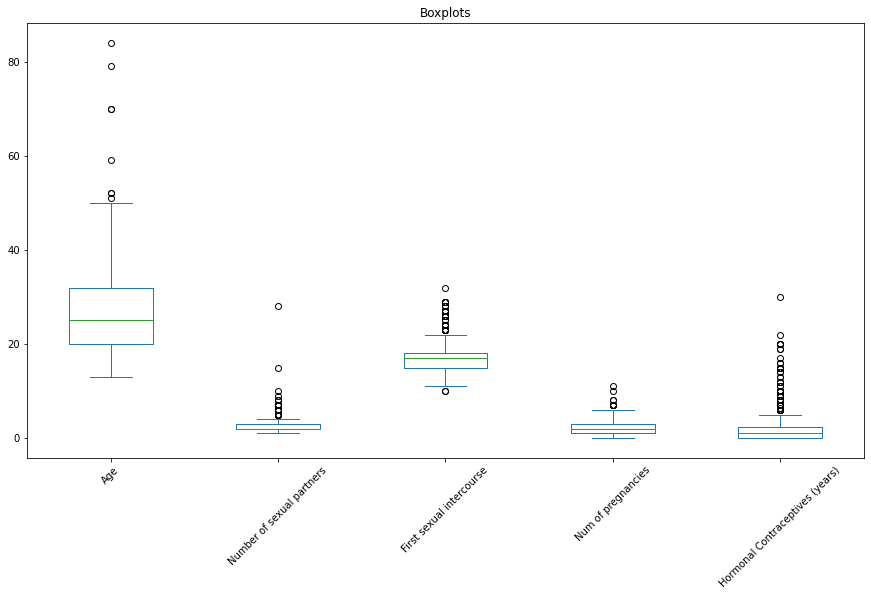

In [37]:
ax = data[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Hormonal Contraceptives (years)']].plot(figsize=(15,8), rot=45, kind='box', title='Boxplots')
plt.show()

Interpretation of the above graph:
- 2nd boxplot has its median=Q1
- 3rd boxplot has also outliers (just 1) below the lower bound 
- 4th boxplot is right skewed 
- the last boxplot shows that there are no values between the lower bound and Q1 

## 2.5. Barchart

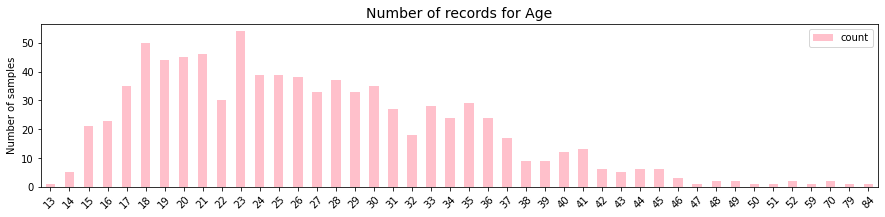

In [38]:
#plotting barchart 
def graph(column):
    #using value_counts I get the counts and using sort_index I get them in an ascending order
    d=data[column].value_counts().sort_index()
    #print("Value counts:")
    #print(d)
    
    unique_value=d.index.tolist()
    count=d.tolist()
    
    bar_graph = pd.DataFrame({'count': count}, index=unique_value)
    ax=bar_graph.plot.bar(figsize=(15,3), rot=45, color={"count": "pink"}, fontsize=10)                  #by adding width = 1.0, it makes it look like a histogram with frequency
    ax.set_title(f'Number of records for {column}',fontsize=14) 
    ax.set_ylabel('Number of samples',fontsize=10)
    
graph(user_input)

## 2.6. Histogram(s)

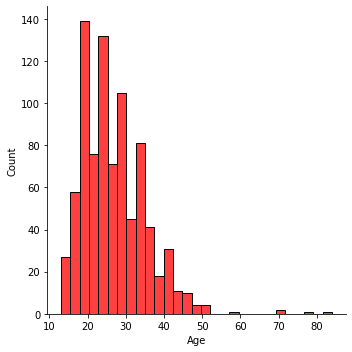

In [39]:
#plotting a histogram to see how the data distribution is (using the Seaborn library) - Simple version
if data.dtypes[user_input]!='bool':
    sns.displot(data[user_input], color='red')
else:
    print("Cannot create this graph because the column type is bool")

Mode = 23
Median = 25.00
Mean = 26.82


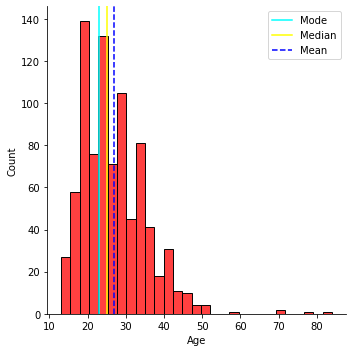

In [40]:
#plotting a histogram to see how the data distribution is (using the Seaborn library) - With Mean/Median/Mode
#also adding mean, median and mode

if data.dtypes[user_input]!='bool':
    mode=data[user_input].mode()[0]
    sns.displot(data[user_input], color='red')
    plt.axvline(mode, color='cyan', linestyle='-', label="Mode")
    plt.axvline(np.median(data[user_input]), color='yellow', linestyle='-', label="Median")
    plt.axvline(np.mean(data[user_input]), color='blue', linestyle='--', label="Mean")
    plt.legend()
    print("Mode =", mode)
    print("Median = %.2f" % np.median(data[user_input]))
    print("Mean = %.2f" % np.mean(data[user_input]))
else:
    print("Cannot create this graph because the column type is bool")

Interpreting:
- Right skewed or positive skew: mode < median < mean
- Symmetrical distribution: mode = median = mean
- Left skewed or negative skew: Mean < median < mode 


In [41]:
#Automating the ABOVE interpretation: 

if data.dtypes[user_input]!='bool':
    print("The interpretation of the above graph is: ")
    mode=data[user_input].mode()[0]
    median=np.median(data[user_input])
    mean=np.mean(data[user_input])
    if mode < median < mean:
        print("Right skewed or positive skew")
    elif mode == median == mean:
        print("Symmetrical distribution")
    elif mean < median < mode:
        print("Left skewed or negative")
    else:
        print("Cannot tell")
else:
    print("Cannot create this graph because the column type is bool")

The interpretation of the above graph is: 
Right skewed or positive skew


In [42]:
# measure the skewness and kurtosis of the distribution as presented in class
print("skew: ", data[user_input].skew())
print("kurtosis: ", data[user_input].kurtosis())

skew:  1.3942787673006407
kurtosis:  4.778575147648968


In [43]:
#measure the skewness and kurtosis of the distribution
data[user_input].agg(['skew', 'kurtosis']).transpose()

skew        1.394279
kurtosis    4.778575
Name: Age, dtype: float64

#### How to interpret skewness:

- If skewness is less than -1 or greater than 1 => the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1 => the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5 => the distribution is approximately symmetric.

#### How to interpret kurtosis:
- A normal distribution has kurtosis of exactly 3 and is called mesokurtic. 
- A distribution with kurtosis >3 is called leptokurtic. Tails are longer and fatter and central peak is higher and sharper (fat tailed). 
- A distribution with kurtosis <3 is called platykurtic. Tails are shorter and thinner and central peak is lower and broader.

In [44]:
#Automating the above interpretation
skew = data[user_input].skew()
kurtosis = data[user_input].kurtosis()

if skew <-1 or skew > 1:
    print("Distribution is highly skewed")
elif -1<=skew<-0.5 or 0.5<skew<=1:
    print("Distribution is moderately skewed")
elif -0.5<skew<0.5:
    print("Distribution is approximately symmetric")
else:
    print("Error!")

if kurtosis == 3:
    print("Kurtosis is Mesokurtic")
elif kurtosis > 3:
    print("Kurtosis is Leptokurtic")
elif kurtosis < 3:
    print("Kurtosis is Platykurtic")
else:
    print("Error!")

Distribution is highly skewed
Kurtosis is Leptokurtic


Mean = 26.821 
Std = 8.493 


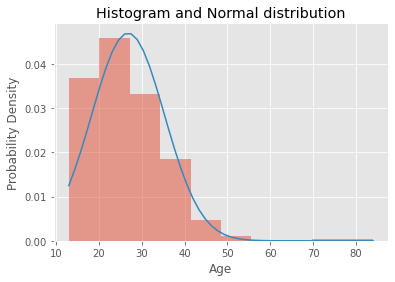

In [45]:
#Histogram & Normal distribution (version 1)

#Histogram
plt.style.use('ggplot')
plt.hist(data[user_input], bins=10, density=True, alpha=0.5)

#Normal distribution 
#going to use scipy.stats
#the below is estimating the parameters (mean and standard deviation) of a normal distribution for our column
[mean_c, std_c] = scipy.stats.norm.fit(data[user_input])
print("Mean = %.3f " % mean_c)
print("Std = %.3f " % std_c)

#defining the domain to plot over, from the minimum of the data/column value to the max of the data/column value
x = np.linspace(np.min(data[user_input]), np.max(data[user_input]))

#pdf = probability of density function; 
#plotting the linspace domain and then the pdf of linspace domain, mean and standard deviation 
plt.plot(x, scipy.stats.norm.pdf(x, mean_c, std_c),)
plt.title("Histogram and Normal distribution")
plt.ylabel("Probability Density")
plt.xlabel(f"{user_input}")
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


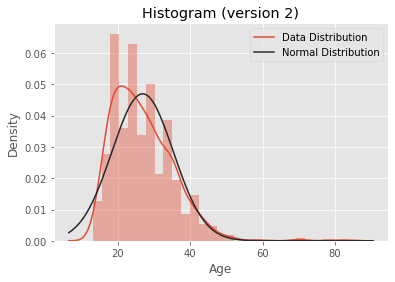

In [46]:
#Histogram, Data distribution & Normal distribution (version 2)
sns.distplot(data[user_input], fit=norm)
plt.title("Histogram (version 2)",)
plt.legend(labels=['Data Distribution','Normal Distribution'])

### 2.6.1. How to deal with skewed data

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


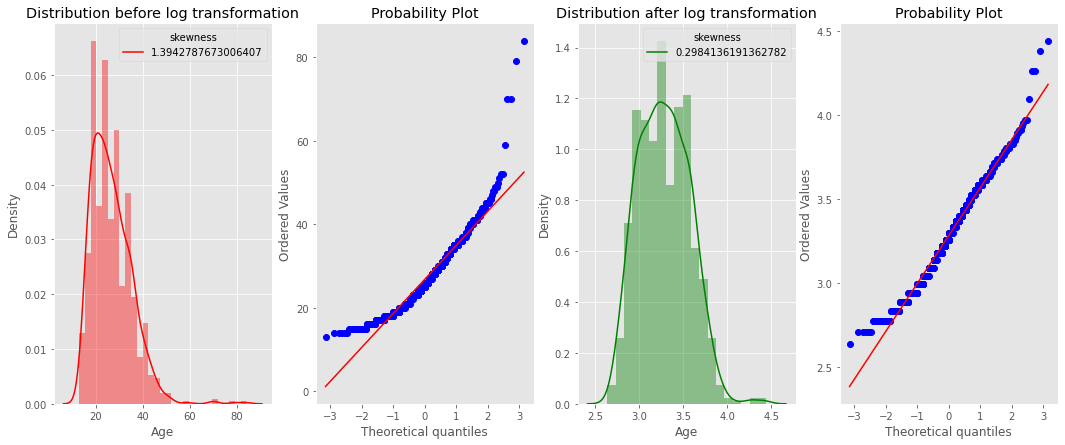

In [47]:
#We are going to be using natural log and P-P (probability) plot

plt.figure(figsize=(18,7))

#distribution before log transformation
plt.subplot(1,4,1)
sns.distplot(data[user_input], color='red')
plt.title("Distribution before log transformation",)
plt.legend([data[user_input].skew()], title="skewness")
#plt.show()

#probability plot for the "distribution before log transformation"
plt.subplot(1,4,2)
stats.probplot(data[user_input], dist="norm", plot=plt)
plt.grid()

#distribution after applying log transformations
plt.subplot(1,4,3)
#np.log1p helps calculate the NATURAL LOG/logarithmic value
data_column_log = np.log1p(data[user_input])
ax = sns.distplot(data_column_log, color='green')
plt.title("Distribution after log transformation",)
plt.legend([data_column_log.skew()], title="skewness")
#plt.show()

#probability plot for the "distribution after"
plt.subplot(1,4,4)
stats.probplot(data_column_log, dist="norm", plot=plt)
plt.grid()

- We apply log transformation because the data does not follow a bell curve. Therefore using log transformation, we can reduce or remove the skweness from the original dataset.

- The P-P (probability) plot can measure how well a theoretical distribution fits the given data. 

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

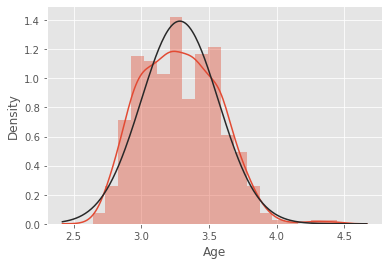

In [48]:
#Appling natural log as shown in class
#data[user_input] = np.log1p(data[user_input])
sns.distplot(np.log1p(data[user_input]), fit=norm)

## 2.7. Scatterplot(s)

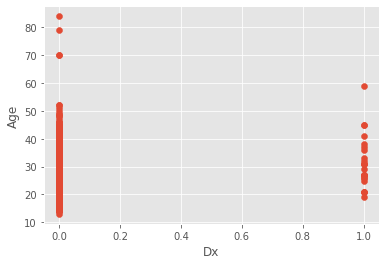

In [49]:
#Scatterplot (v1)
plt.scatter(data['Dx'], data['Age'])
plt.xlabel('Dx')
plt.ylabel('Age')
plt.show()

In [50]:
#Scatterplot (v2)
selected_columns = data[['Age', 'Number of sexual partners']]
scatter_data = selected_columns.copy()

fig = px.scatter(scatter_data, x="Age", y="Number of sexual partners")
fig.show()

corr, _ = pearsonr(data['Age'], data['Number of sexual partners'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.085


Interpration of the above graph:

- it can be concluded that there is no correlation between the two columns 
- 2 outliers could be identified. 

In [51]:
#Scatterplot (v2)
selected_columns = data[['Age', 'Num of pregnancies']]
scatter_data = selected_columns.copy()

fig = px.scatter(scatter_data, x="Age", y="Num of pregnancies")
fig.show()

corr, _ = pearsonr(data['Age'], data['Num of pregnancies'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.526


Interpretation for Pearson Correlation (which measures the strength of a relationship between two variables):
   
  - Strong positive correlation: 0.75-1
  - Moderate positive correlation: 0.5-0.75
  - Weak positive correlation: 0.1-0.5
  - No correlation: 0 - 0.1
  
  - Strong negative correlation: -0.75 -> -1
  - Moderate negative correlation: -0.5 -> -0.75
  - Weak negative correlation: -0.1 -> -0.5
  - No correlation: 0 -> -0.1

In [52]:
# calculate covariance matrix
covariance = cov(data['Age'], data['Number of sexual partners'])
print(covariance)

[[72.21512132  1.18568052]
 [ 1.18568052  2.69706354]]


## 2.8. Heatmap

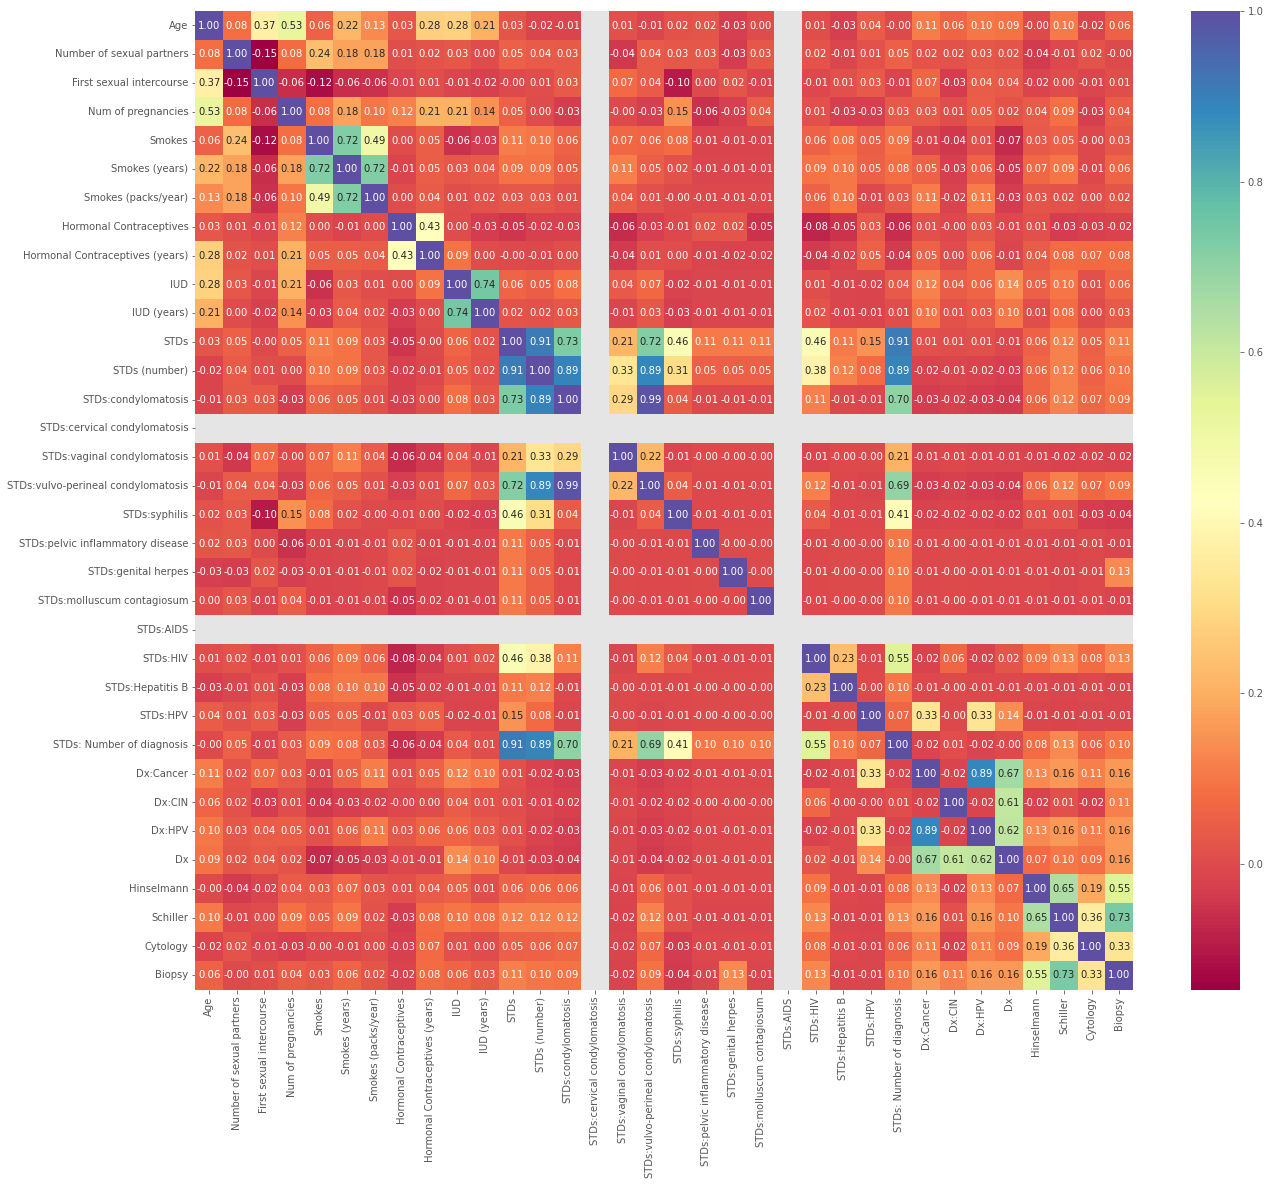

In [53]:
#Heatmap / Pearson correlation
corr_matrix = data.corr()
#print(corr_matrix)
plt.figure(figsize = (21,18))
sns.heatmap(corr_matrix, cmap="Spectral", annot=True, fmt='.2f')
plt.show()

0.75 -> 1: Strong positive correlation
- STDs - STDs (number)
- STSs - STDs: Number of diagnosis
- STDs (number) - STDs:condylomatosis
- STDs (number) - STDs:vulvo-perineal condylomatosis
- STDs (number) - STDs: Number of diagnosis
- STDs:condylomatosis - STDs:vulvo-perineal condylomatosis
- Dx:Cancer - Dx:HPV


0.5 -> 0.75: Moderate positive correlation
- Age - Number of pregnancies
- Smokes - Smokes (years)
- Smokes (years) - Smokes (packs/year)
- IUD - IUD (years)
- STDs - STDs:condylomatosis
- STDs - STDs:vulvo-perineal condylomatosis
- STDs:vulvo-perineal condylomatosis - STDs: Number of diagnosis
- STDs:HIV - STDs: Number of diagnosis
- STDs: Number of diagnosis - STDs:condylomatosis
- Dx:Cancer - Dx
- Dx:CIN - Dx
- Dx:HPV - Dx
- Hinselmann - Schiller
- Hinselmann - Biopsy
- Schiller - Biopsy

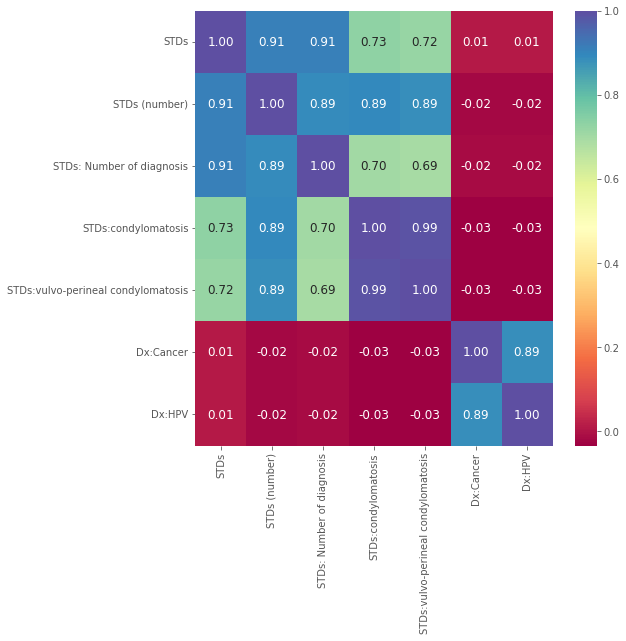

In [54]:
#Heatmap / Pearson correlation for Strong positive correlation
#selecting the columns I am interested in adding to a new dataframe
selected_columns = data[['STDs','STDs (number)','STDs: Number of diagnosis', 'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'Dx:Cancer', 'Dx:HPV']]

#making a new dataframe only with the selected columns
str_data = selected_columns.copy()
#print(str_data)
corr_matrix_str_data = str_data.corr()
#print(corr_matrix)

plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix_str_data, cmap="Spectral", annot=True, fmt='.2f', annot_kws={"fontsize":12})
plt.show()

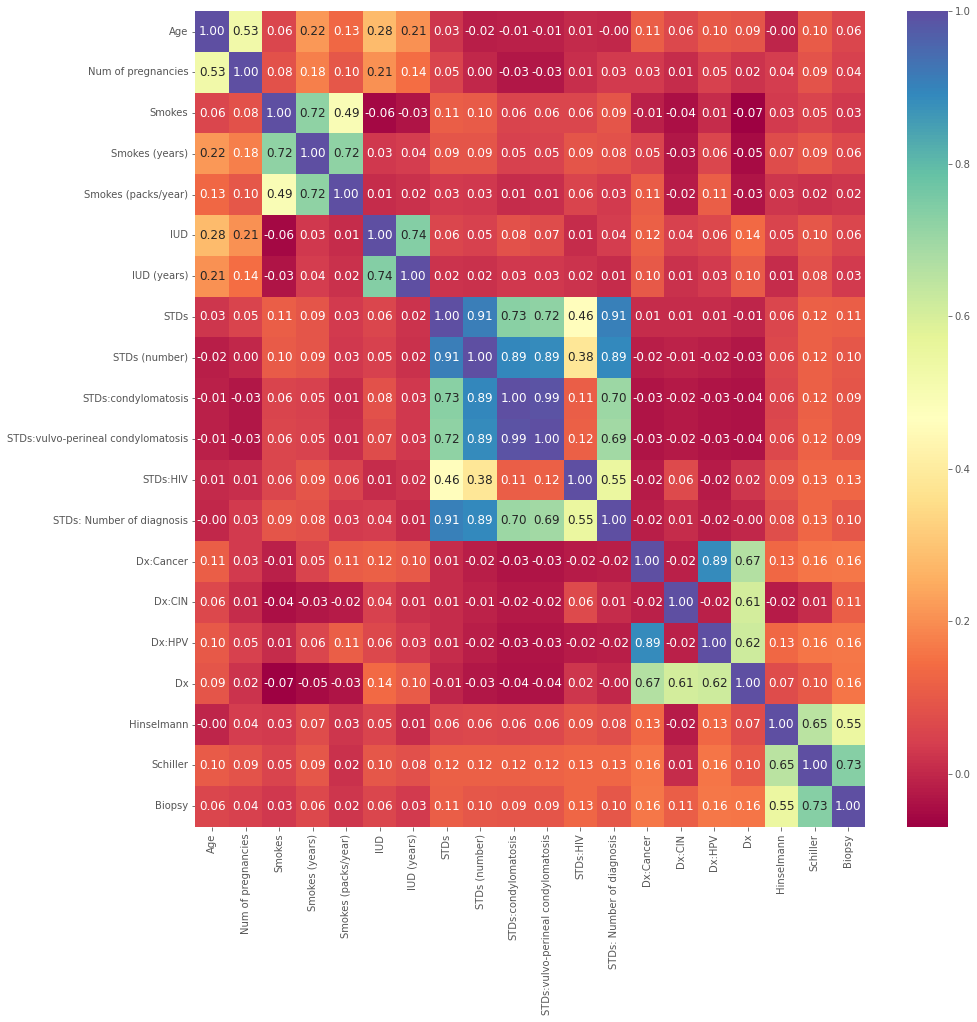

In [55]:
#Heatmap / Pearson correlation for Strong and moderate positive correlation

#selecting the columns I am interested in adding to a new dataframe
selected_columns = data[['Age','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','IUD','IUD (years)','STDs','STDs (number)','STDs:condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:HIV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Biopsy']]

#making a new dataframe only with the selected columns
str_data = selected_columns.copy()
#print(str_data)

corr_matrix_str_data = str_data.corr()
#print(corr_matrix)

plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix_str_data, cmap="Spectral", annot=True, fmt='.2f', annot_kws={"fontsize":12})

plt.show()

Please insert a number from -1 to 1 for the correlation matrix: 0.5


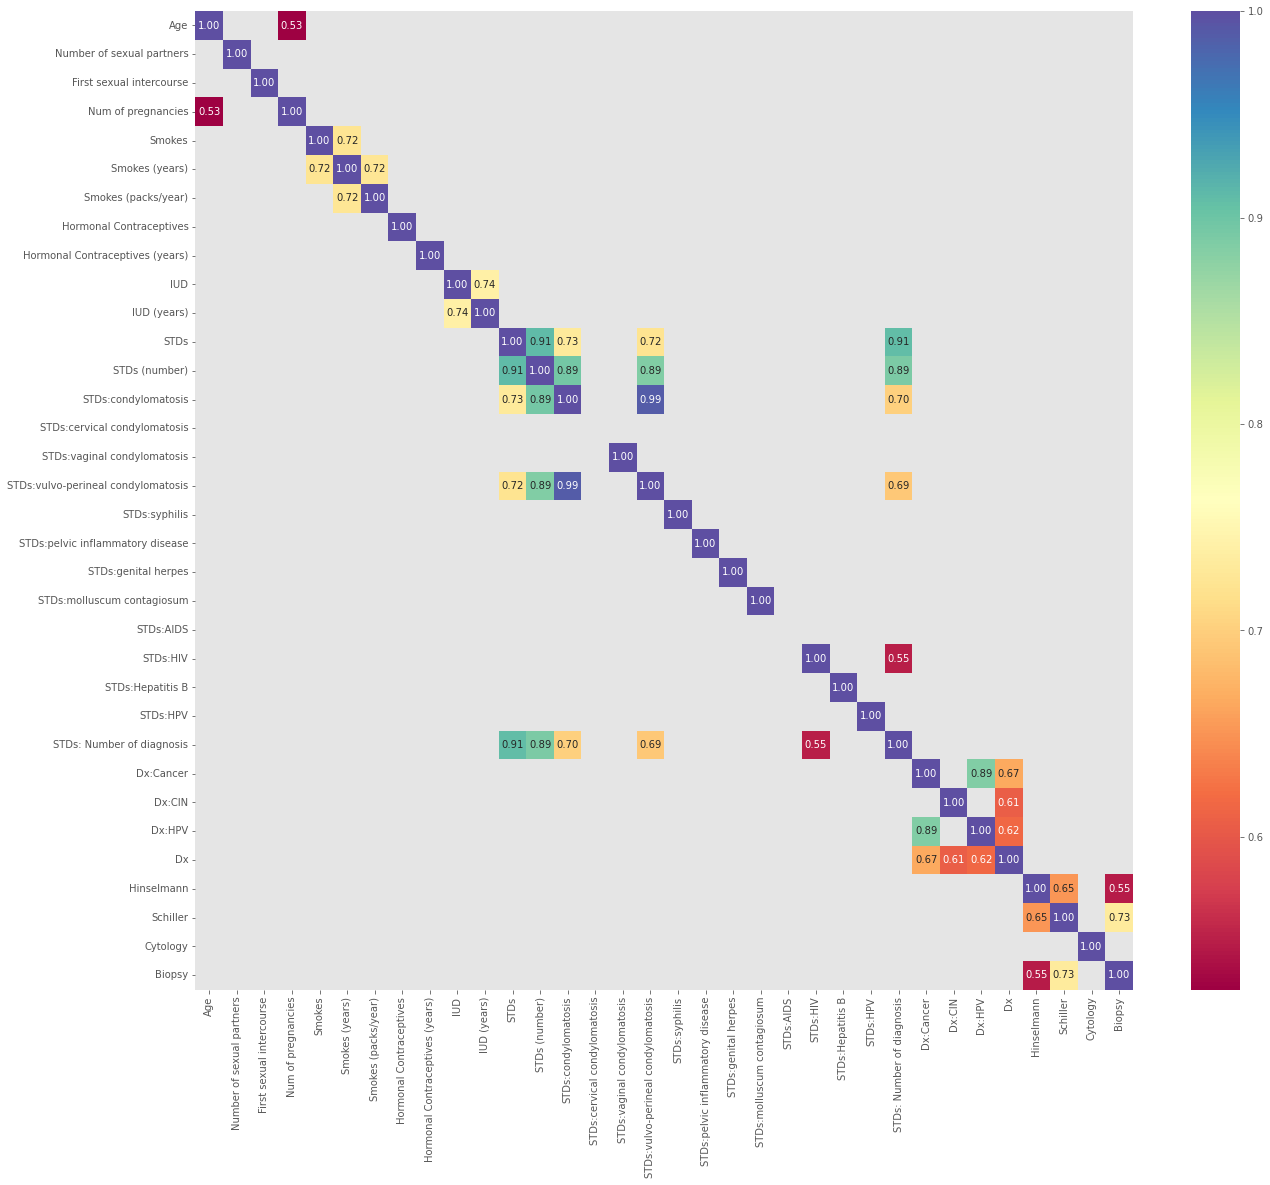

In [56]:
#Heatmap / Pearson correlation

user_input_corr = float(input("Please insert a number from -1 to 1 for the correlation matrix: "))

corr_matrix = data.corr()

corr_user_input = corr_matrix[corr_matrix>=float(user_input_corr)]

#print(corr_matrix)
plt.figure(figsize = (21,18))
sns.heatmap(corr_user_input, cmap="Spectral", annot=True, fmt='.2f')
plt.show()

# 3. Data Modelling and Visualisation

## 3.1. Time series

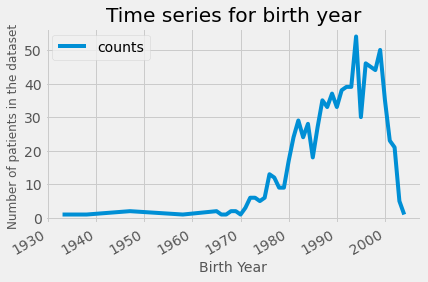

In [57]:
#calculating the possible year when the patients were born (2017 (year when data was donated)-their age)

selected_columns = data[['Age']]
#print(selected_columns)
list_year=[]

for i in range(len(selected_columns)):
    get_age=selected_columns['Age'].values[i]
    #print(get_age)
    year=2017-int(get_age) #data was donated in 2017, assuming it was collected the same year
    list_year.append(year)
#print(list_year)

#creating a DF with the new year only data
year_only = {'Year': list_year}
year_only_data = pd.DataFrame(year_only)
#print(year_only_data)

#Getting value counts
#using value_counts I get the counts and using sort_index I get them in an ascending order
var=year_only_data.value_counts().sort_index()
#print(var)

#from var i am extracting and putting the values into 2 different other variables
year_values=var.index.tolist()

#making tuple to array
year_values_2=np.asarray(year_values)
#flattening the array
year_values_f=year_values_2.flatten()
#print(year_values_f)

counts=var.tolist()
#print(count)

year_counts_data = pd.DataFrame({'date': year_values_f, 
                                'counts': counts})
#print(year_counts_data)

#transforming year to date format
#needing to add 'format="%Y", otherwise it does not work properly, creating errors
year_counts_data['date'] = pd.to_datetime(year_counts_data['date'], format="%Y")
#print(year_counts_data.dtypes)

year_counts_data = year_counts_data.set_index('date')
#print(year_counts_data)

#creating graph
plt.style.use('fivethirtyeight')
ax = year_counts_data.plot()
ax.set_xlabel('Birth Year', fontsize=14)
ax.set_ylabel('Number of patients in the dataset', fontsize=12)
ax.set_title('Time series for birth year')
plt.show()

## 3.2. Violin plots

<AxesSubplot:xlabel='Biopsy', ylabel='Age'>

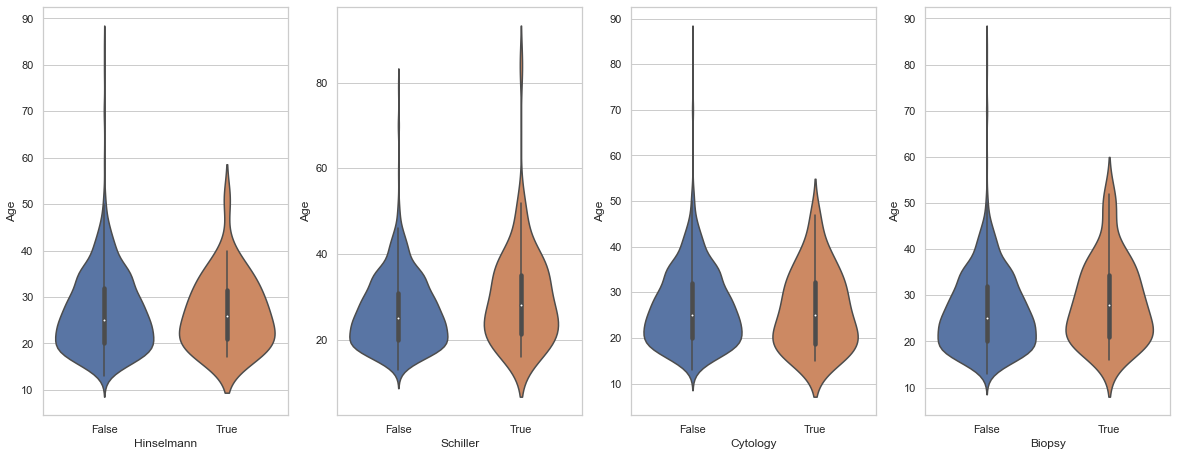

In [58]:
#shows distribution and density

sns.set_theme(style="whitegrid")
plt.figure(figsize=(18,7))

plt.subplot(1,4,1)
sns.violinplot(x=data['Hinselmann'], y=data['Age'])

plt.subplot(1,4,2)
sns.violinplot(x=data['Schiller'], y=data['Age'])

plt.subplot(1,4,3)
sns.violinplot(x=data['Cytology'], y=data['Age'])

plt.subplot(1,4,4)
sns.violinplot(x=data['Biopsy'], y=data['Age'])


## 3.3. Hexplot

<AxesSubplot:xlabel='Age', ylabel='Hormonal Contraceptives (years)'>

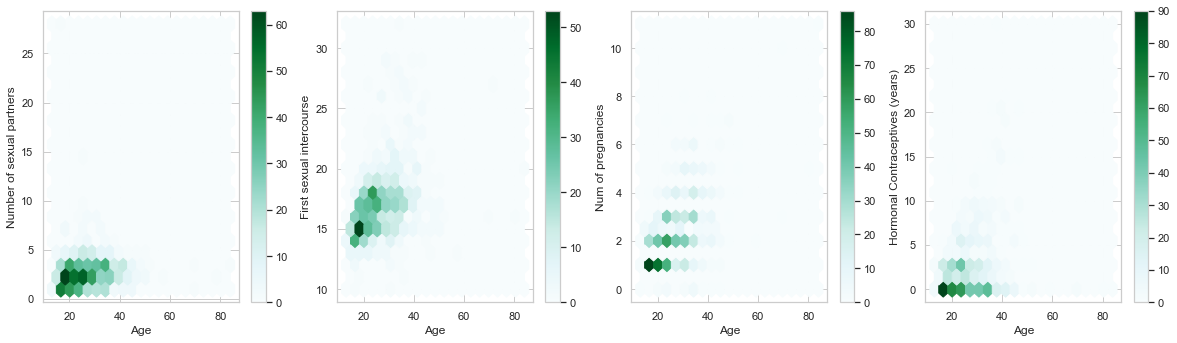

In [59]:
#show the density of the datapoints within the specific hexbin 

fig = plt.figure(figsize=(18,5))

ax = plt.subplot(1,4,1)
data.plot.hexbin(ax=ax, x='Age', y='Number of sexual partners', gridsize=20)

ax = plt.subplot(1,4,2)
data.plot.hexbin(ax=ax, x='Age', y='First sexual intercourse', gridsize=20)

ax = plt.subplot(1,4,3)
data.plot.hexbin(ax=ax, x='Age', y='Num of pregnancies', gridsize=20)

ax = plt.subplot(1,4,4)
data.plot.hexbin(ax=ax, x='Age', y='Hormonal Contraceptives (years)', gridsize=20)

Interpretation of the above graphs:
- Graph 1: high density for age just below 20 with about 2.5 number of sexual partners. 
- Graph 2: high density for age just below 20 with 15 age of years for sexual intercourse. 
- Graph 3: high density for age just below 20 with 1 as the number of pregnancies.
- Graph 4: high density for age just below 20 with 0 years taking hormonal contraceptives. 
- Overall, low density is spread out in different directions.

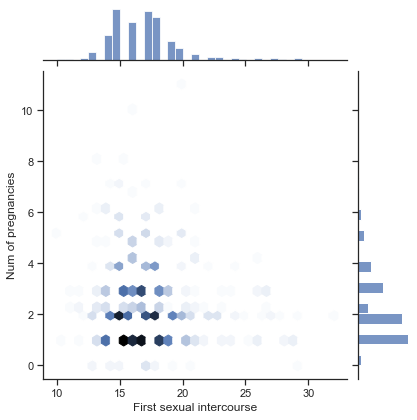

In [60]:
#Hexplot using sns (another version)

sns.set_theme(style="ticks")
sns.jointplot(data=data, x='First sexual intercourse', y='Num of pregnancies', kind="hex")

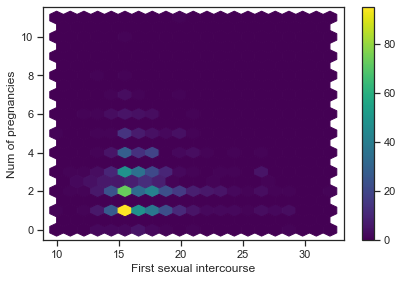

In [61]:
#Hexplot - different style
ax = data.plot.hexbin(x='First sexual intercourse', y='Num of pregnancies', gridsize=20,cmap="viridis")

## 3.4. Treemap

In [62]:
fig = px.treemap(data,
                path=['Smokes', 'Smokes (years)'],
                #values='',
                color='Smokes (packs/year)',
                color_continuous_scale='PRGn',
                width=1000,
                height=600,
                title="Smoking patients and years of smoking colour coded by smokes(packs/year)",)
fig.show()

C:\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## 3.5. Radar chart

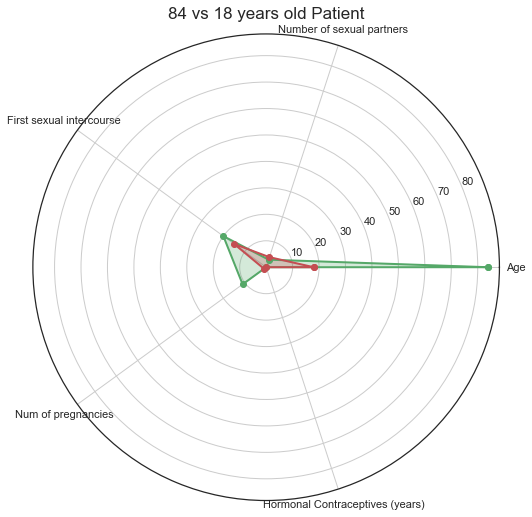

In [63]:
#Patient 1: age=84 years old
labels = np.array(['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Hormonal Contraceptives (years)'])
stats1 = data.loc[668, labels].values
#print(data.loc[668])
#print("stats=", stats)

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

#close the plot 1
stats1 = np.concatenate((stats1, stats1[0]), axis=None)
angles = np.concatenate((angles, angles[0]), axis=None)
#print(stats1)
#print(angles)

#-------------------
#Patient 2: age=18 years old
stats2 = data.loc[0, labels].values
#print(data.loc[0])

#close the plot 2
stats2 = np.concatenate((stats2, stats2[0]), axis=None)

#--------Graph
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, stats1, 'o-', linewidth=2, color='g')
ax.fill(angles, stats1, alpha=0.25, color='g')

ax.plot(angles, stats2, 'o-', linewidth=2, color='r')
ax.fill(angles, stats2, alpha=0.25, color='r')

ax.set_thetagrids((angles * 180/np.pi)[0:5], labels)
ax.set_title("84 vs 18 years old Patient", fontsize=17)
ax.grid(True)
plt.show()

## 3.6. Random Forest Classifier for feature importance

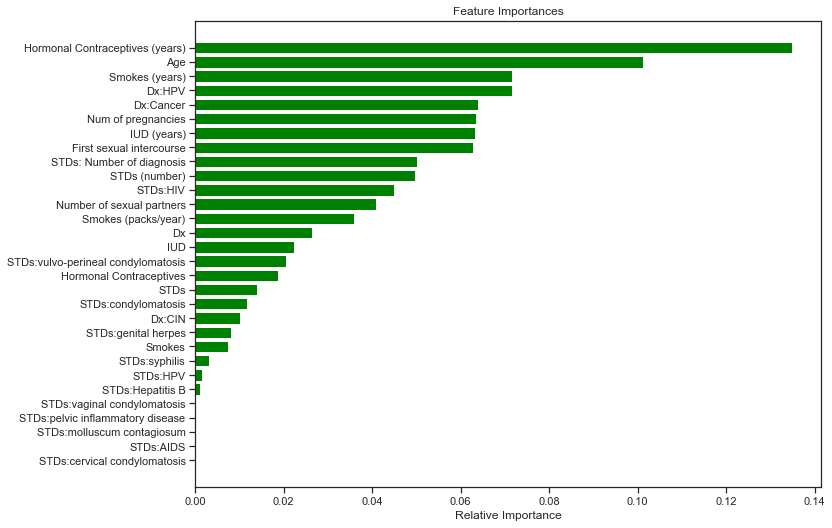

In [64]:
# random forest for feature importance on a classification problem

#split data
X_data = data.drop(['Hinselmann', 'Schiller', 'Cytology', 'Biopsy'], axis=1)
y_data = data[['Hinselmann', 'Schiller', 'Cytology', 'Biopsy']]

#declare the random forest model
rf_model = RandomForestClassifier(random_state=1, max_depth=4)
#fit the random forest model
rf_model.fit(X_data, y_data)

train_features = X_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)#[-20:]

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 3.7.  Simple Linear Regression (with user input for prediction)

coefficients:  [[0.09299482]]
intercept:  [-0.17660432]


Text(0, 0.5, 'Num of pregnancies')

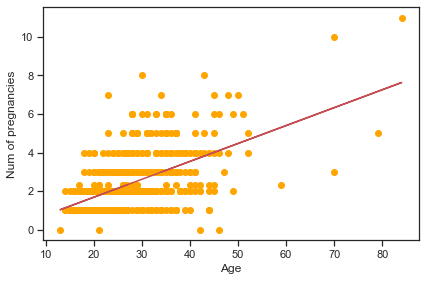

In [65]:
#Scatterplot
data_linear_reg = data[['Age', 'Num of pregnancies']]
# plt.scatter(data_linear_reg['Age'], data_linear_reg['Num of pregnancies'])
# plt.xlabel('Age')
# plt.ylabel('Num of pregnancies')
# plt.show()

#generating training and testing data from our data
#we are using 80% data for training and the remaining for testing
train = data_linear_reg[:(int((len(data_linear_reg)*0.8)))]
test = data_linear_reg[(int((len(data_linear_reg)*0.8))):]

#print("train", train)
#print("test", test)

#shuffle data
train = shuffle(train)
test = shuffle(test)
#print(train)

#modeling - Linear Regression
regr = linear_model.LinearRegression()
train_x = np.array(train[['Age']])
train_y = np.array(train[['Num of pregnancies']])
regr.fit(train_x, train_y)

#the coefficients
print('coefficients: ', regr.coef_)   # slope
print('intercept: ', regr.intercept_) # intercept

#y=slope*X + intercept =0.09*X+(-0.17) 
#plotting the regression line
plt.scatter(train['Age'], train['Num of pregnancies'], color='orange')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Age')
plt.ylabel('Num of pregnancies')

In [66]:
#function for predicting future values
def get_regression_predictions(input_var, intercept, slope):
    predicted_values = input_var*slope + intercept
    return predicted_values

#get age from user to estimate
check_age = int(input("Please insert age for making prediction: "))
estimated_no_of_preg = get_regression_predictions(check_age, regr.intercept_[0], regr.coef_[0][0])

print("Estimated number of pregnancies for a patient with the age of", check_age, "is", estimated_no_of_preg.round(2))


Please insert age for making prediction: 55
Estimated number of pregnancies for a patient with the age of 55 is 4.94


In [67]:
#Checking model's performance for test data

test_x = np.array(test[['Age']])
test_y = np.array(test[['Num of pregnancies']])
test_y_ = regr.predict(test_x)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean square error (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error (MAE): 0.99
Mean square error (MSE): 1.58
R2-score: -2.36


Interpretation of the above results:
- MAE: it is a small MAE suggesting that the model is great at predicting.
- MSE: it is a small value which means that the data values are dispersed closesly to mean. 
- R2-score: the model is not following the trend of the data; it gives so great performance because of overfitting.

Overall interpretation as learnt in class:
- A small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. A MAE of 0 means that your model is a perfect predictor of the outputs (but this will almost never happen). 
- Mean Square Error (MSE): This measures the squared average distance between the real data and the predicted data. A larger MSE means that the data values are dispersed widely around its central moment (mean), and a smaller MSE shows that your data values are dispersed closely to its central moment (mean).
- R-squared (R2) is a goodness-of-fit measure for linear regression models. The higher the R-squared, the better the model fits your data. Best possible score is 1.0.

#### Another Simple Linear Regression: 'Age' vs 'Hormonal Contraceptives (years)'

coefficients:  [[0.10939964]]
intercept:  [-0.65489807]
Mean absolute error (MAE): 2.46
Mean square error (MSE): 15.11
R2-score: -22.32


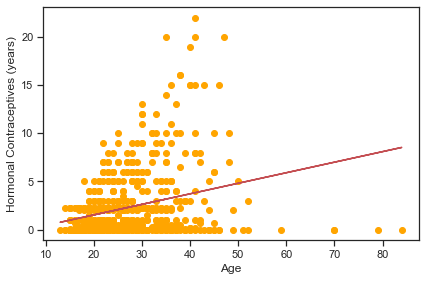

In [68]:
data_linear_reg = data[['Age', 'Hormonal Contraceptives (years)']]

#generating training and testing data from our data
#we are using 80% data for training and the remaining for testing
train = data_linear_reg[:(int((len(data_linear_reg)*0.8)))]
test = data_linear_reg[(int((len(data_linear_reg)*0.8))):]

#shuffle data
train = shuffle(train)
test = shuffle(test)

#modeling - Linear Regression
regr = linear_model.LinearRegression()
train_x = np.array(train[['Age']])
train_y = np.array(train[['Hormonal Contraceptives (years)']])
regr.fit(train_x, train_y)

#the coefficients
print('coefficients: ', regr.coef_)   # slope
print('intercept: ', regr.intercept_) # intercept

#y=slope*X + intercept =0.09*X+(-0.17) 
#plotting the regression line
plt.scatter(train['Age'], train['Hormonal Contraceptives (years)'], color='orange')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Age')
plt.ylabel('Hormonal Contraceptives (years)')

test_x = np.array(test[['Age']])
test_y = np.array(test[['Hormonal Contraceptives (years)']])
test_y_ = regr.predict(test_x)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean square error (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

## 3.8. Multiple Linear Regression (with user input for prediction)

In [69]:
X=data[['Hormonal Contraceptives (years)', 'Age', 'Smokes (years)', 'Dx:HPV', 'Dx:Cancer', 'Num of pregnancies', 
        'IUD (years)', 'First sexual intercourse']]
y=data['Cytology']

regr = linear_model.LinearRegression()
regr.fit(X,y)

#print('Coefficients: ', regr.coef_)

#Ask user for details
age=int(input('Age (int): '))
fsi=int(input('First sexual intercourse (age) (int): '))
nop=float(input('Number of pregnancies (float): '))
sy=float(input('Smoking (number of years)(float): '))
iudy=float(input('IUD (number of years)(float): '))
hc=float(input("Hormonal Contraceptives (number of years)(float): "))

#bool doesn't work properly for input
dxhpv=input('Diagnosis of HPV (bool- True/False)? ')
if dxhpv=="True":
    dxhpv=True
else:
    dxhpv=False
dxc=input('Diagnosis of (other) cancer (bool- True/False)? ')
if dxc=="True":
    dxc=True
else:
    dxc=False
#print(hc, age, sy, dxhpv, dxc, nop, iudy, fsi)

#predicting based on user inputs
predicted_cytology = regr.predict([[hc, age, sy, dxhpv, dxc, nop, iudy, fsi]])

print('\n----------------------------------------')
print('Predicted level for Cytology (which is used to diagnose or screen for cancer): ', predicted_cytology.round(2))
print('The values of cytology are from 0(=negative) to 1(=postive); the closer to 0 means less changes.')

Age (int): 55
First sexual intercourse (age) (int): 19
Number of pregnancies (float): 5
Smoking (number of years)(float): 0
IUD (number of years)(float): 0
Hormonal Contraceptives (number of years)(float): 0
Diagnosis of HPV (bool- True/False)? True
Diagnosis of (other) cancer (bool- True/False)? False

----------------------------------------
Predicted level for Cytology (which is used to diagnose or screen for cancer):  [0.09]
The values of cytology are from 0(=negative) to 1(=postive); the closer to 0 means less changes.


## 3.9. K-means clustering

In [70]:
kmeans_data=data[['Hormonal Contraceptives (years)', 'Age', 'Smokes (years)', 'Cytology']]

#convert 'Cytology' column to a numerical one using technique called Label Encoding
labelEncoder = LabelEncoder()
labelEncoder.fit(kmeans_data['Cytology'])
kmeans_data['Cytology']=labelEncoder.transform(kmeans_data['Cytology'])

#creating the training data 
X_data = np.array(kmeans_data.drop(['Cytology'],1).astype(float))

#we want Cytology to verify the data clustered as our y data
y_data = np.array(kmeans_data['Cytology'])

#build the K-Means model
#cluster the patients records into 2: positive cytology or negative cytology
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_data)

correct = 0
for i in range(len(X_data)):
    predict_me = np.array(X_data[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_data[i]:
        correct = correct+1

value=correct/len(X_data)
print("Records correctly clustered: ", round(value*100,2), "%")

Records correctly clustered:  63.05 %


C:\Users\DENISE~1\AppData\Local\Temp/ipykernel_22276/975126977.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DENISE~1\AppData\Local\Temp/ipykernel_22276/975126977.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [71]:
kmeans_data=data[['Hormonal Contraceptives (years)', 'Age', 'Smokes (years)', 'Dx:HPV', 'Dx:Cancer', 'Cytology']]

#convert 'Cytology' column to a numerical one using technique called Label Encoding
labelEncoder = LabelEncoder()
labelEncoder.fit(kmeans_data['Cytology'])
labelEncoder.fit(kmeans_data['Dx:HPV'])
labelEncoder.fit(kmeans_data['Dx:Cancer'])
kmeans_data['Cytology']=labelEncoder.transform(kmeans_data['Cytology'])
kmeans_data['Dx:HPV']=labelEncoder.transform(kmeans_data['Dx:HPV'])
kmeans_data['Dx:Cancer']=labelEncoder.transform(kmeans_data['Dx:Cancer'])

#creating the training data 
X_data = np.array(kmeans_data.drop(['Cytology'],1).astype(float))

#we want Cytology to verify the data clustered as our y data
y_data = np.array(kmeans_data['Cytology'])

#build the K-Means model
#cluster the patients records into 2: positive cytology or negative cytology
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_data)

correct = 0
for i in range(len(X_data)):
    predict_me = np.array(X_data[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_data[i]:
        correct = correct+1

value=correct/len(X_data)
print("Records correctly clustered: ", round(value*100,2), "%")

C:\Users\DENISE~1\AppData\Local\Temp/ipykernel_22276/3435206687.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DENISE~1\AppData\Local\Temp/ipykernel_22276/3435206687.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DENISE~1\AppData\Local\Temp/ipykernel_22276/3435206687.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Records correctly clustered:  63.05 %


## 3.10. Naive Bayes Classification (with user inputs for prediction)

In [72]:
nbc_data=data[['Hormonal Contraceptives (years)', 'Age', 'Smokes (years)', 'Num of pregnancies', 'IUD (years)', 
               'First sexual intercourse']]
nbc_target=data['Cytology']

#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(nbc_data,
                                                   nbc_target,
                                                   test_size=0.2,
                                                   random_state=109)
#create a gaussian classifier
gnb = GaussianNB()
#train the model using the training sets
gnb.fit(X_train, y_train)

#predict the response for test dataset
y_pred = gnb.predict(X_test)

#model accuracy, how often is the classifier correct?
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy: ", round(acc*100,2), "%")

Accuracy:  95.93 %


In [73]:
nbc_data=data[['Hormonal Contraceptives (years)', 'Age', 'Smokes (years)', 'Num of pregnancies', 
               'IUD (years)','First sexual intercourse']]
nbc_target=data['Cytology']

#convert 'Cytology' column to a numerical one using technique called Label Encoding
labelEncoder = preprocessing.LabelEncoder()
target = labelEncoder.fit_transform(nbc_target)
#print("nbc target=",target)

#combining the nbc_data into single list of tuples
features = [tup for tup in zip(nbc_data['Hormonal Contraceptives (years)'], nbc_data['Age'],nbc_data['Smokes (years)'],nbc_data['Num of pregnancies'],nbc_data['IUD (years)'],nbc_data['First sexual intercourse'])]
#print("features=",features)

#create a Gaussian Classifier
model = GaussianNB()

#train the model using the training sets
model.fit(features, target)

#Ask user for info in order to make the prediction:
age=int(input('Age (int): '))
fsi=int(input('First sexual intercourse (age) (int): '))
nop=float(input('Number of pregnancies (float): '))
sy=float(input('Smoking (number of years)(float): '))
iudy=float(input('IUD (number of years)(float): '))
hc=float(input("Hormonal Contraceptives (number of years)(float): "))

predicted = model.predict([[hc, age, sy, nop, iudy, fsi]])
#predicted = model.predict([[1, 35, 0, 6, 0, 18]]) -> this is from the dataset and the value for 'cytology' is 1 but it predicts 0
print("Predicted value for Cytology: ", predicted)
print("0=negative; 1=positive")

Age (int): 55
First sexual intercourse (age) (int): 19
Number of pregnancies (float): 3
Smoking (number of years)(float): 5
IUD (number of years)(float): 5
Hormonal Contraceptives (number of years)(float): 0
Predicted value for Cytology:  [0]
0=negative; 1=positive


It seems that it is very biased due to the data imbalance. 

(Barely found a set of values that will predict cytology=1:
Age (int): 97
First sexual intercourse (age) (int): 89
Number of pregnancies (float): 5
Smoking (number of years)(float): 5
IUD (number of years)(float): 6
Hormonal Contraceptives (number of years)(float): 6
Predicted value for Cytology:[1])



----------------------------------------------------------------------------------------------------------------------

<h2><center>Thank you!</center></h2>

----------------------------------------------------------------------------------------------------------------------